# Лабораторная работа №3. Синтез БИХ-фильтров




## Модуль 1. Метод размещения нулей и полюсов.


### Задача 1.1 Синтез цифрового резонатора

| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |     $7$ |    $8$ |    $9$ |    $10$ | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_0$  | $0.25$ | $0.2$ | $0.1$ |  $—$ | $—$ | $—$ | $0.3$ | $0.15$ | $0.35$ | $0.4$ |
|$\theta_0$ | $—$ | $—$ | $—$ | $\dfrac\pi6$ | $\dfrac\pi3$ | $\dfrac\pi2$ |  $—$ | $—$ | $—$ | $—$ |

Синтезировать методом размещения нулей и полюсов цифровой резонатор для частоты $\nu_0$ или $\theta_0$ (в зависимости от варианта). Параметр, влияющий на добротность резонатора, подобрать самостоятельно.

* Построить нуль-полюсную диаграмму получившегося фильтра.
* Записать передаточную функцию $H(z)$.
* Вычислить аналитически импульсную и переходную характеристики и сравнить с результатами моделирования.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.

$$H(z) = \frac{G}{1 - 2\alpha cos(2 \pi \nu_0)z^{-1} + \alpha^2z^{-2}}$$

Где

$$G = (1 - \alpha) * |1 - \alpha e^{4 \pi j \nu_0}|

In [4]:
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt

z =  []
p =  [-0.27811529+0.85595086j -0.27811529-0.85595086j]
k =  0.18072715871929443


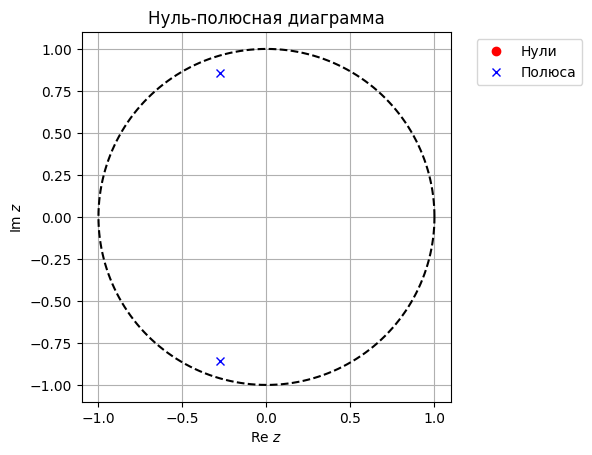

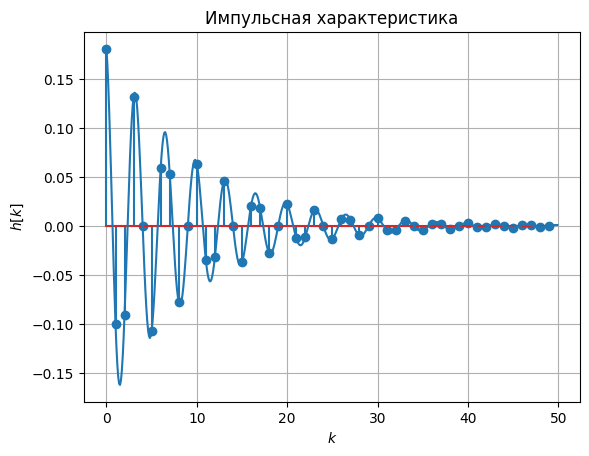

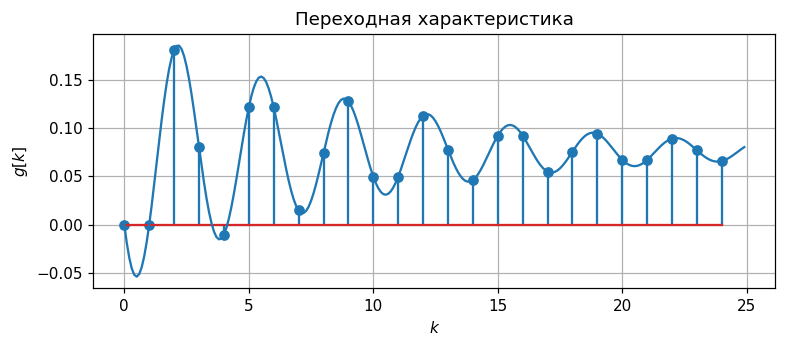

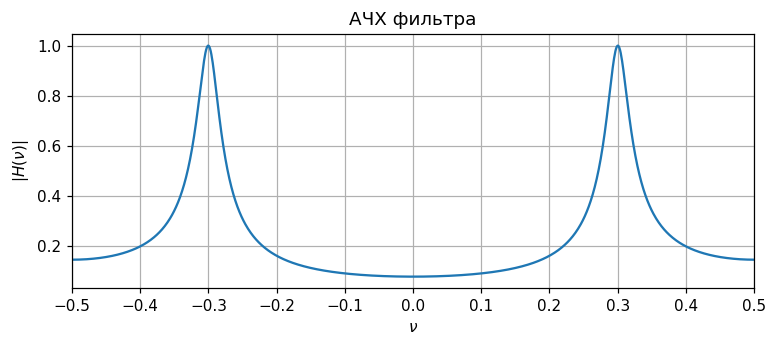

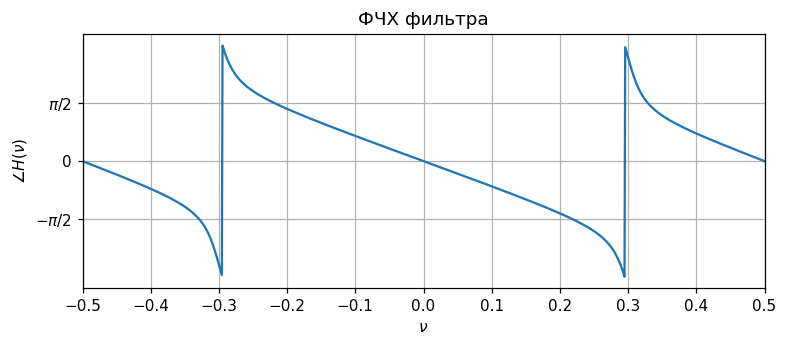

In [17]:
def task1_1():
    r = 0.9
    nu_0 = 0.3
    # G = (1 - r) * np.abs(1 - r * np.exp(1j * 4 * np.pi * nu_0)) / np.abs(1 - np.exp(1j * 4 * np.pi * nu_0))
    G = (1 - r) * np.abs(1 - r * np.exp(1j * 4 * np.pi * nu_0))
    alpha = np.array([1, -2 * r * np.cos(2 * np.pi * nu_0), r * r])
    # beta = np.array([G, 0, -G])
    beta = np.array([G])
    z, p, k = signal.tf2zpk(b=beta, a=alpha)
    print("z = ", z)
    print("p = ", p)
    print("k = ", k)
    system=signal.dlti(z, p, k, dt=1)

    w, H = signal.dfreqresp(system, w=np.linspace(-np.pi, np.pi, 1024))

    q = np.linspace(0, 2*np.pi, 401)
    plt.plot(np.cos(q), np.sin(q), 'k--')  

    plt.plot(z.real, z.imag, 'ro', label='Нули')
    plt.plot(p.real, p.imag, 'bx', label='Полюса')
    plt.grid()
    plt.axis('image')
    plt.axis([-1.1, 1.1, -1.1, 1.1])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
    plt.title("Нуль-полюсная диаграмма")
    plt.xlabel("Re $z$")
    plt.ylabel("Im $z$")
    plt.show()

    N = 50
    h_inp = signal.unit_impulse(N)
    h_output = signal.lfilter(b=beta, a=alpha, x=h_inp)
    # k_arr = np.arange(1, 50, 0.1)
    # alpha_powered = np.power(r, k_arr - 1)
    # true_h = G * alpha_powered * np.sin(2 * np.pi * nu_0 * k_arr) / np.sin(2 * np.pi * nu_0)
    k_arr = np.arange(0, 50, 0.1)
    alpha_powered = np.power(r, k_arr)
    true_h = G * alpha_powered * np.sin(2 * np.pi * nu_0 * (k_arr + 1)) / np.sin(2 * np.pi * nu_0)
    plt.figure()
    plt.stem(h_output)
    plt.plot(k_arr, true_h)
    plt.xlabel("$k$")
    plt.ylabel("$h[k]$")
    plt.title("Импульсная характеристика")
    plt.grid()
    plt.show()

    # g_first = 1 / ((1 - r * np.exp(-theta_0 * 1j)) * (1 - r * np.exp(theta_0 * 1j)))
    # first_numer = np.power(r * np.exp(-1j * theta_0), g_k_arr)
    # first_denom = -2 * 1j * r * np.sin(theta_0) * (r * np.exp(-1j * theta_0) - 1)
    # second_numer = np.power(r * np.exp(1j * theta_0), g_k_arr)
    # second_denom = 2 * 1j * r * np.sin(theta_0) * (r * np.exp(1j * theta_0) - 1)
    # true_g = g_first + first_numer / first_denom + second_numer / second_denom
    # true_g *= G 

    g_k_arr = np.arange(0, 25, 0.1)

    theta_0 = 2 * np.pi * nu_0
    g_coeff = G / (np.sum(alpha))
    sin_arr_1 = np.sin(theta_0 * (g_k_arr - 1))
    sin_arr_2 = np.sin(theta_0 * (g_k_arr))
    alpha_powered_2 = np.power(r, g_k_arr - 1)
    true_g = np.ones_like(alpha_powered_2) + alpha_powered_2 * ( -sin_arr_2 + r * sin_arr_1) / np.sin(theta_0)
    true_g *= g_coeff

    t, y = signal.dstep(system, n=25)
    plt.figure(figsize=[8, 3], dpi=110)
    plt.stem(t, np.squeeze(y))
    plt.plot(g_k_arr, true_g)
    plt.xlabel("$k$")
    plt.ylabel("$g[k]$")
    plt.title("Переходная характеристика")
    plt.grid()
    plt.show()

    plt.figure(figsize=[8, 3], dpi=110)
    plt.plot(w/(2*np.pi), abs(H))
    plt.xlabel("$\\nu$")
    plt.ylabel("$|H(\\nu)|$")
    plt.title("АЧХ фильтра")
    plt.xlim([-0.5, 0.5])
    plt.xticks(np.linspace(-0.5, 0.5, 11))
    plt.grid()
    plt.show()

    plt.figure(figsize=[8, 3], dpi=110)
    plt.plot(w/(2*np.pi), np.angle(H))
    plt.xlabel("$\\nu$")
    plt.ylabel("$\\angle H(\\nu)$")
    plt.title("ФЧХ фильтра")
    plt.xlim([-0.5, 0.5])
    plt.xticks(np.linspace(-0.5, 0.5, 11))
    plt.yticks([-np.pi/2, 0, np.pi/2], labels=("$-\\pi/2$", "0", "$\\pi/2$"))

    plt.grid()
    plt.show()

task1_1()

### Задача 1.2 Синтез цифрового фильтра Hum removal

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |  
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_0$, Гц  | 250 | 350 | 400 |  200 | 100 | 150 | 250 | 500| 600 | 350 |
|  $f_д$, Гц | 1000 | 1000 | 1000 | 500 | 500 | 500 | 1000 | 2000 | 2000 | 2000 |

Синтезировать методом размещения нулей и полюсов цифровой фильтр Hum removal  для частоты $f_{0}$, $f_{д}$. Параметр, влияющий на добротность, подобрать самостоятельно.

* Записать передаточную функцию $H(z)$.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.


$$H(z)={{G}_{0}}\frac{\left( 1-\exp (j{{\theta }_{0}}){{z}^{-1}} \right)\left( 1-\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)}{\left( 1-A\exp (j{{\theta }_{0}}){{z}^{-1}} \right)\left( 1-A\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)}$$

$$G_0 = \frac{1- 2Acos(\theta_0) + A^2}{2 - 2 cos(\theta_0)}$$

In [6]:
def plot_H_1(w, H):
    plt.figure(figsize=[8, 3], dpi=110)
    plt.plot(w/(2*np.pi), abs(H))
    plt.xlabel("$\\nu$")
    plt.ylabel("$|H(\\nu)|$")
    plt.title("АЧХ фильтра")
    plt.xlim([-0.5, 0.5])
    plt.xticks(np.linspace(-0.5, 0.5, 11))
    plt.grid()
    plt.show()

In [ ]:
def task1_2():
    f_s = 2000
    f_0_not_norm = 500
    f_0 = f_0_not_norm / f_s
    beta, alpha = signal.iirnotch(f_0, Q=2.5, fs=1)
    theta_0 = 2 * np.pi * f_0

    z, p, k = signal.tf2zpk(beta, alpha)
    print(z, p, k)
    system_lib =signal.dlti(z, p, k, dt=1)
    
    w, H = signal.dfreqresp(system_lib, w=np.linspace(-np.pi, np.pi, 1024))
    plot_H_1(w, H)
    
    A=0.7
    z=np.array([np.exp(1j*theta_0), np.exp(-1j*theta_0)])
    p=np.array([A*np.exp(1j*theta_0), A*np.exp(-1j*theta_0)])
    k=(1 - 2 * A * np.cos(theta_0) + A * A) / (2 - 2  * np.cos(theta_0))
    print(z, p, k)
    system_mine =signal.dlti(z, p, k, dt=1)
    w, H = signal.dfreqresp(system_mine, w=np.linspace(-np.pi, np.pi, 1024))
    plot_H_1(w, H)

[1.11022302e-16+1.j 1.11022302e-16-1.j] [4.62158877e-17+0.71381051j 4.62158877e-17-0.71381051j] 0.7547627247472144


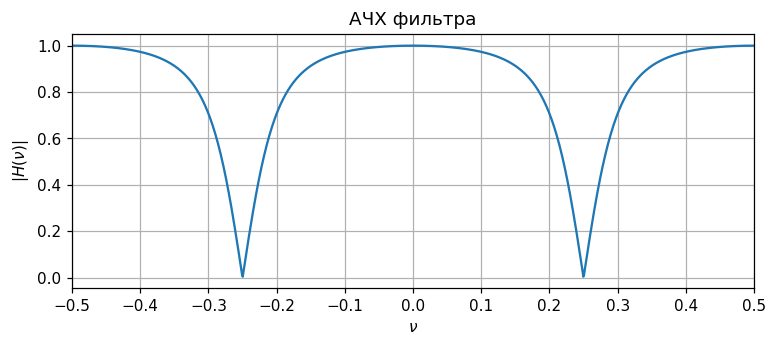

[6.123234e-17+1.j 6.123234e-17-1.j] [4.2862638e-17+0.7j 4.2862638e-17-0.7j] 0.745


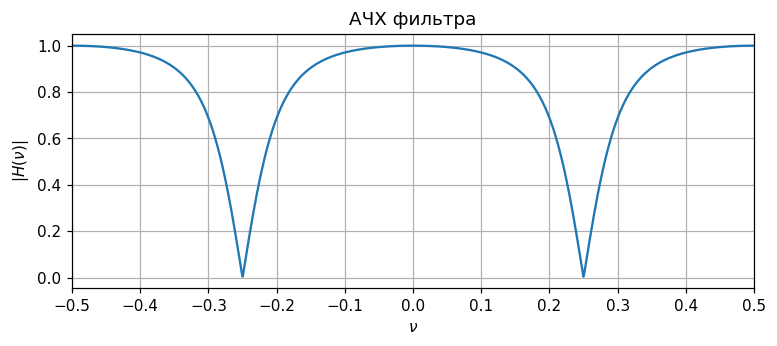

In [8]:
task1_2()

## Модуль 2. Метод билинейного *z*-преобразования

### Задача 2.1 Синтез фильтра нижних частот (ФНЧ)

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_д$, Гц  | 6000 | 6200 | 6400 |  6600 | 6800 | 7000 | 6200 | 6400 |  6600 | 6800 |
|  $f_1$, Гц | 800 | 860 | 920 | 980 | 1040 | 1100 | 860 | 920 | 980 | 1040 |
|  $f_2$, Гц | 1100 | 1170 | 1240 | 1310 | 1380 | 1450 |1170 | 1240 | 1310 | 1380 |
|  $a_{max}$, дБ | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 |0.4455 | 0.4455 | 0.4455 | 0.4455 |
|  $a_{min}$, дБ | 40 | 40 | 40 | 40 | 40 | 40 |40 | 40 | 40 | 40 |

 Получить коэффициенты разностного уравнения БИХ-фильтра нижних частот со следующими характеристиками:
* частота дискретизации $f_{д}$, 
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимальное допустимое затухание в полосе пропускания $a_{max}$,
* минимальное допустимое затухание в полосе задерживания $a_{min}$.

Воспользоваться методом билинейного z-преобразования для фильтров: 

1) Баттервота,

2) Чебышёва 1 рода,

3) Чебышёва 2 рода,

4) Золотарёва—Кауэра.

Из четырех получившихся результатов выбрать фильтр, обладающий наименьшим порядком $N$ и построить схему его реализации в виде каскада биквадратных блоков. Для биквадратных блоков выбрать прямую каноническую реализацию. 


In [9]:
def plot_H_2(f, H, fs, Wn, wp, ws):
    plt.figure()
    plt.plot(f, (abs(H)))
    plt.xlim([-fs/2, fs/2])
    plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
    plt.xlabel("$f$, Гц")
    plt.ylabel("$|H(f)|$")
    plt.grid()
    plt.show()


In [68]:
def task_2_1():
    fs=6200
    wp=860
    ws=1170
    gpass = 0.445
    gstop = 40 

    # Баттерворд
    functions = [(signal.buttord, signal.butter), (signal.cheb1ord, signal.cheby1),
                 (signal.cheb2ord, signal.cheby2), (signal.ellipord, signal.ellip)]
    names = ['Butter', 'Cheby1', 'Cheby2', 'Z-K']

    beta_list = []
    alpha_list = []
    N, Wn = signal.buttord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
    beta, alpha = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)
    beta_list.append(beta)
    alpha_list.append(alpha)
    f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
    print(N, Wn)
    plot_H_2(f, H, fs=fs, Wn=Wn, wp=wp, ws=ws)
    N_min = N
    N_min_index = 0

    N, Wn = signal.cheb1ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
    beta, alpha= signal.cheby1(N=N, rp=gpass, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
    f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
    beta_list.append(beta)
    alpha_list.append(alpha)
    print(N, Wn)
    plot_H_2(f, H, fs=fs, Wn=Wn, wp=wp, ws=ws)
    if(N < N_min):
        N_min = N
        N_min_index = 1


    N, Wn = signal.cheb2ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
    beta, alpha= signal.cheby2(N=N, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
    f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
    beta_list.append(beta)
    alpha_list.append(alpha)
    print(N, Wn)
    plot_H_2(f, H, fs=fs, Wn=Wn, wp=wp, ws=ws)
    if(N < N_min):
        N_min = N
        N_min_index = 2

    N, Wn = signal.ellipord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
    beta, alpha = signal.ellip(N=N, rp=gpass, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
    f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
    beta_list.append(beta)
    alpha_list.append(alpha)
    print(N, Wn)
    plot_H_2(f, H, fs=fs, Wn=Wn, wp=wp, ws=ws)
    if(N < N_min):
        N_min = N
        N_min_index = 3

    print(N_min, N_min_index)
    print(signal.tf2sos(beta_list[N_min_index], alpha_list[N_min_index], pairing='keep_odd'))


16 913.7142126413871


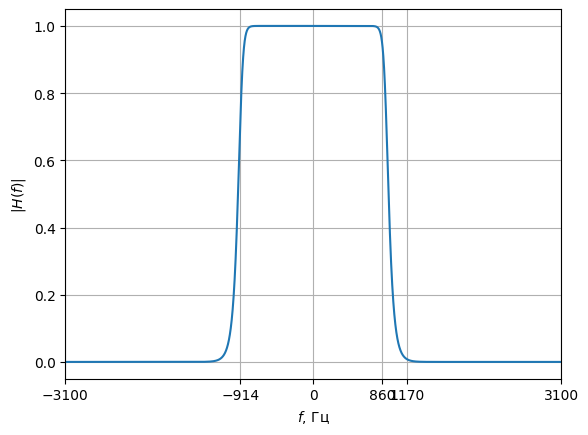

8 860.0


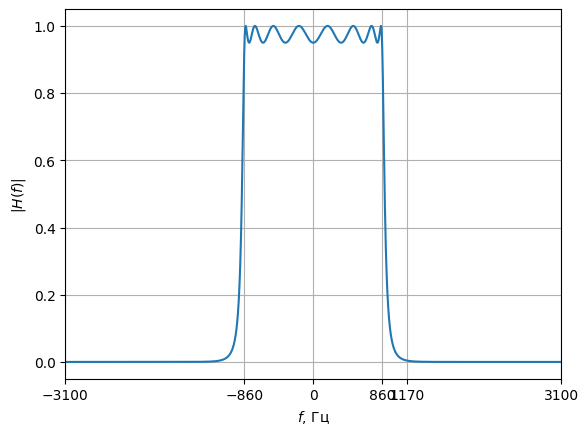

8 1100.0460546552838


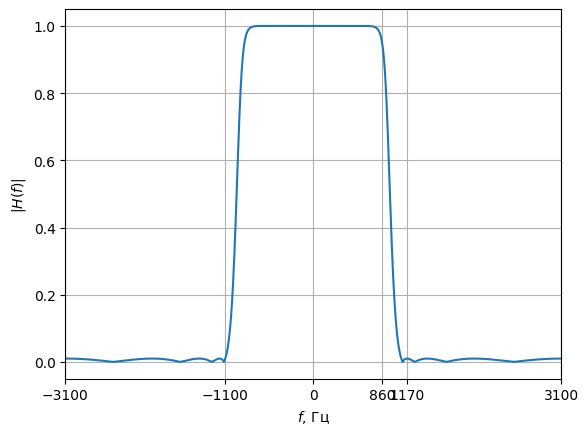

5 860.0


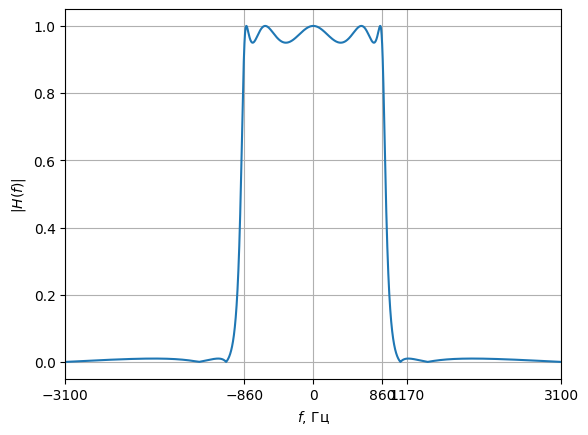

5 3
[[ 0.02650966  0.02650966  0.          1.         -0.63198945  0.        ]
 [ 1.         -0.24399449  1.          1.         -1.22251827  0.62208221]
 [ 1.         -0.89973952  1.          1.         -1.20378993  0.90043097]]


In [69]:
task_2_1()

In [28]:
def get_orignal_graphs(to_plot = True):
    R = 1000
    C = 1e-7
    RC = R * C
    dt=R * C/8
    lti_RC=signal.lti([1], [(R * C) ** 2, 2 * R * C, 1])
    t, h_a = signal.impulse(lti_RC) # импульсная характеристика аналогового фильтра
    w, H_a=signal.freqresp(lti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)/dt)
    if to_plot:
        plt.figure()
        plt.plot(w, np.abs(H_a))
        plt.xlabel("$w$")
        plt.ylabel("$|H(w)|$")
        plt.title("АЧХ фильтра")
        plt.grid()
        plt.show()
        plt.figure()
        plt.plot(t, np.abs(h_a))
        plt.xlabel("$t$")
        plt.ylabel("$|h(\\t)|$")
        plt.title("Импульсная характеристика фильтра")
        plt.grid()
        plt.show()
    return (t, h_a), (w, H_a)

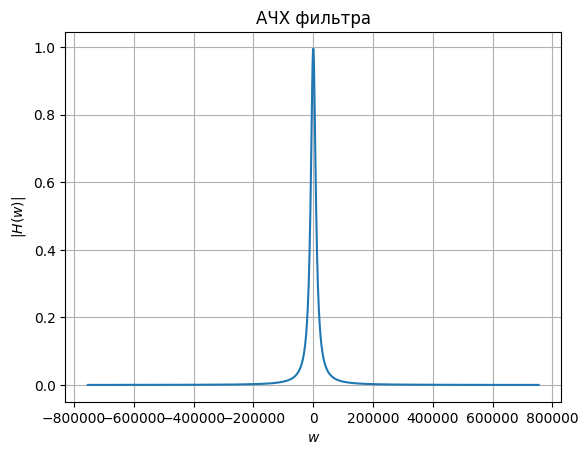

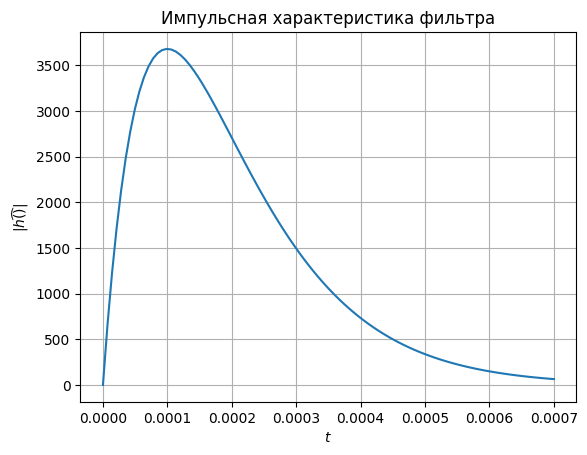

In [29]:
ret_val = get_orignal_graphs()

### Задача 2.2 Синтез аналога двухкаскадного RC-фильтра (I способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом билинейного *z*-преобразования.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

$$H = \frac{1}{(1 + RCp)^2} = \frac{1}{1 + 2RCp + (RCp)^2} $$
$$p = \frac{2}{\Delta t} \frac{1 - z^{-1}}{1 + z^{-1}}$$
$$H(z) = \frac{1}{(RC)^2} \frac{1}{( \frac{2}{\Delta t} \frac{1 - z^{-1}}{1 + z^{-1}} + \frac{1}{RC} )^2} = \frac{(\Delta t)^ 2}{(RC)^2} \frac{1 + 2z^{-1} + z^{-2}}{(2 + \frac{\Delta t}{RC} + (\frac{\Delta t}{RC} - 2)z^{-1})^2} = $$
$$= \frac{(\Delta t)^ 2}{(RC)^2} \frac{1 + 2z^{-1} + z^{-2}}{(2 + \frac{\Delta t}{RC})^2 + 2(\frac{\Delta t^ 2}{(RC)^2} - 4)z^{-1}+ (\frac{\Delta t}{RC} - 2)^2z^{-2}}$$

In [65]:
def task2_2():
    R = 2000
    C = 1e-7
    RC = R * C
    delta_t = RC / 8
    k_sqrt = delta_t / (R  * C)
    k = (k_sqrt) ** 2
    beta = [k, 2 * k, k]
    alpha = [(2 + k_sqrt) ** 2, 2 * (k - 4), (k_sqrt - 2) ** 2]
    dlti_RC=signal.dlti(beta, alpha, dt=delta_t)
    theta_d, H_d=signal.dfreqresp(dlti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024))
    (true_h_t, true_h), (__, true_H) = get_orignal_graphs(False)
    theta_size = theta_d.size
    plt.figure(figsize=[8, 4], dpi=120)
    plt.plot(theta_d/(2*np.pi*delta_t), np.abs(H_d), label="Synth H")
    plt.plot(theta_d/(2*np.pi*delta_t), np.abs(true_H), '.-g', label="True H")
    plt.xlabel("$w$")
    plt.ylabel("$|H(w)|$")
    plt.title("АЧХ фильтров")
    plt.grid()
    plt.legend(fontsize=10)
    plt.show()

    plt.figure(figsize=[8, 4], dpi=120)
    plt.plot((theta_d/(2*np.pi*delta_t))[int(theta_size/3) + 20:int(2*theta_size/3) - 20],
             (10 * np.log10(np.abs(H_d)))[int(theta_size/3) + 20:int(2*theta_size/3) - 20], label="Synth H")
    plt.plot((theta_d/(2*np.pi*delta_t))[int(theta_size/3) + 20:int(2*theta_size/3) - 20],
             (10 * np.log10(np.abs(true_H)))[int(theta_size/3) + 20:int(2*theta_size/3) - 20], '.-g', label="True H")
    plt.xlabel("$w$")
    plt.ylabel("$|H(w)|$")
    plt.title("АЧХ фильтров")
    plt.grid()
    plt.legend(fontsize=10)
    plt.show()
    t, h = signal.dimpulse(dlti_RC)
    plt.figure()
    print(true_h[18] / h[0][18])
    plt.plot(t, np.abs(h[0]), label="Synth h")
    plt.plot(true_h_t, np.abs(true_h) * delta_t, '.-g', label="True h")
    plt.legend(fontsize=10)
    plt.xlabel("$t$")
    plt.ylabel("$|h(\\t)|$")
    plt.grid()
    plt.title("Импульсная характеристика фильтров")
    plt.show()

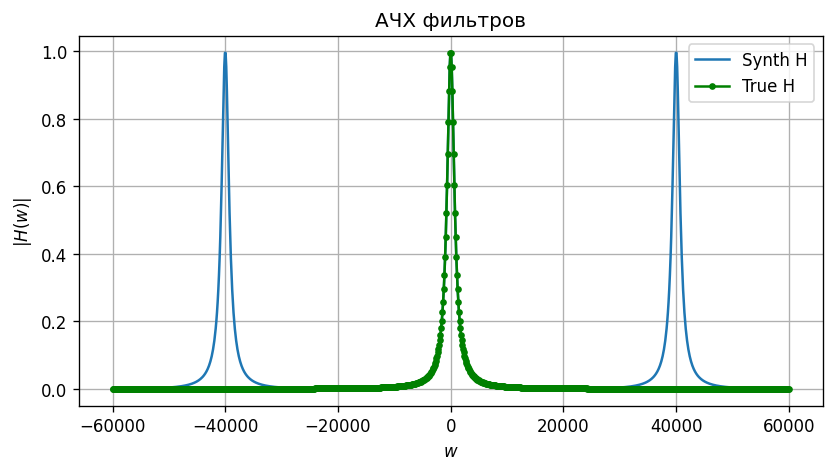

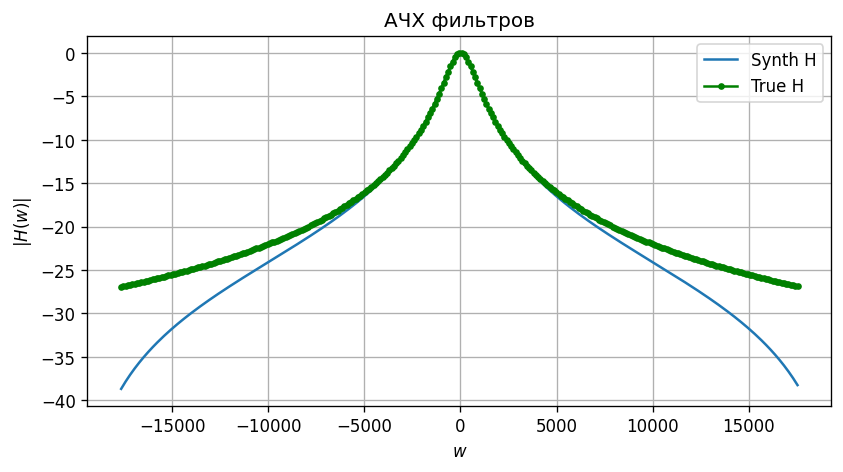

[120075.20339551]


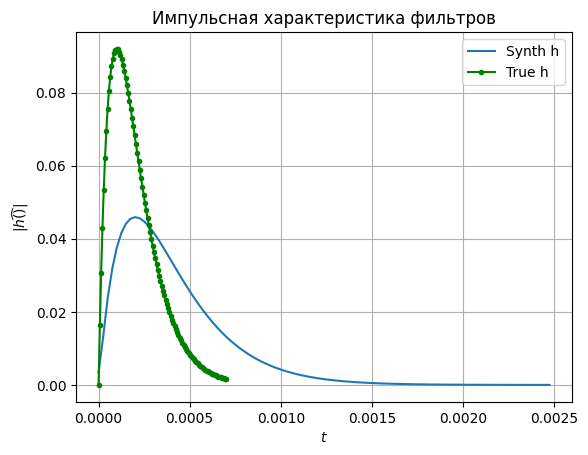

In [70]:
task2_2()

## Модуль 3. Метод инвариантной импульсной характеристики.

### Задача 3.1 Синтез аналога двухкаскадного RC-фильтра (II способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом инвариантной импульсной характеристики.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

$$H_a = \frac{1}{(1 + RCp)^2} = \frac{1}{1 + 2RCp + (RCp)^2} $$

$$ h_a = \frac{1}{(RC)^2} Res_{p} \frac{e^{pt}}{(\frac{1}{RC} + p)^2} = \frac{1}{(RC)^2} t e^{-\frac{t}{RC}}$$
$$ h = \frac{\Delta t^2}{(RC)^2} k e^{-\frac{\Delta t k}{RC}}$$

$$ H(z) = \frac{\Delta t^2}{(RC)^2} \sum_{k = 0}^{\infty} k e^{-\frac{\Delta t k}{RC}} z^{-k} = \frac{\Delta t^2}{(RC)^2} \frac{e ^ {-\frac{\Delta t}{RC}} z^{-1}}{1 - 2 e^{-\frac{\Delta t}{RC}}z^{-1} + e^{-\frac{2\Delta t}{RC}}z^{-2}}$$

In [66]:
def task_3_1():
    R = 1000
    C = 1e-7
    RC = R * C
    delta_t = RC / 8
    k_sqrt = delta_t / (R  * C)
    k = (k_sqrt) ** 2
    exp_needed = np.exp(-delta_t / (R * C))
    beta = [0, k * exp_needed]
    alpha = [1, -2 * exp_needed, exp_needed ** 2]
    dlti_RC=signal.dlti(beta, alpha, dt=delta_t)
    theta_d, H_d=signal.dfreqresp(dlti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024))
    (true_h_t, true_h), (__, true_H) = get_orignal_graphs(False)
    plt.figure()
    plt.plot(theta_d, np.abs(true_H), '.-g', label="true H")
    plt.plot(theta_d, np.abs(H_d), label="Synth H")
    plt.legend(fontsize=10)
    plt.xlabel("$w$")
    plt.ylabel("$|H(w)|$")
    plt.title("АЧХ фильтров")
    plt.grid()
    plt.show()

    theta_size = theta_d.size
    plt.figure(figsize=[8, 4], dpi=120)
    plt.plot((theta_d/(2*np.pi*delta_t))[int(theta_size/3) + 20:int(2*theta_size/3) - 20],
             (10 * np.log10(np.abs(H_d)))[int(theta_size/3) + 20:int(2*theta_size/3) - 20], label="Synth H")
    plt.plot((theta_d/(2*np.pi*delta_t))[int(theta_size/3) + 20:int(2*theta_size/3) - 20],
             (10 * np.log10(np.abs(true_H)))[int(theta_size/3) + 20:int(2*theta_size/3) - 20], '.-g', label="True H")
    plt.xlabel("$w$")
    plt.ylabel("$|H(w)|$")
    plt.title("АЧХ фильтров")
    plt.grid()
    plt.legend(fontsize=10)
    plt.show()



    t, h = signal.dimpulse(dlti_RC)
    print(np.max(np.abs(true_h)) / np.max(np.abs(h[0])))
    plt.figure()
    plt.plot(t, np.abs(h[0]), label="Synth h")
    plt.plot(true_h_t, np.abs(true_h) * delta_t, '.-g', label="true h")
    plt.legend(fontsize=10)
    plt.xlabel("$t$")
    plt.ylabel("$|h(\\t)|$")
    plt.grid()
    plt.title("Импульсная характеристика фильтров")
    plt.show()

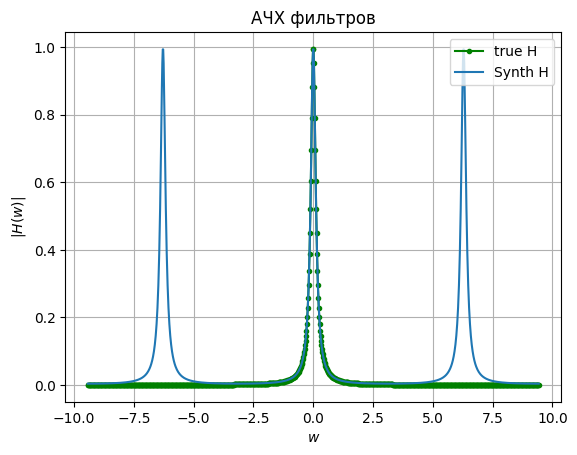

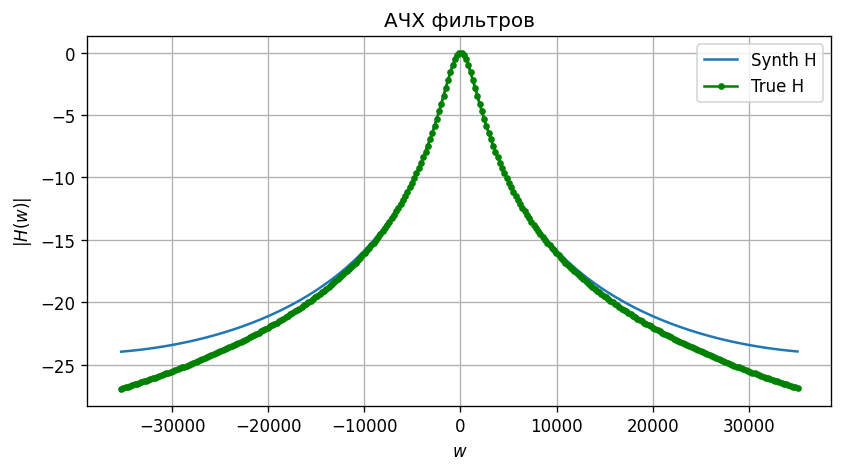

79995.8911964772


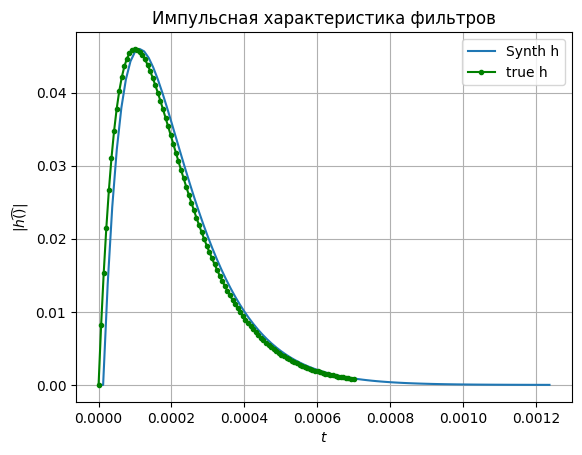

In [71]:
task_3_1()

### Задача 3.2 Цифровая фильтрация реальных сигналов (творческая задача)

Выполнить фильтрацию `.wav` файла с помощью одного из цифровых фильтров, рассмотренных в первой и второй лабораторной работах. Проиллюстрировать, как в результате фильтрации изменился сигнал. Привести пример, для чего выбранный фильтр может быть применен. 

Для этой задачи `.wav` файл можно загрузить, например, с сайта [freesound.org](https://freesound.org/) или взять из предыдущих лабораторных работ.

In [82]:
def oscilloscope_file_read(file, const_level=0):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
    return fs, signal_lev 

def analyse(fs, signal_lev, window='boxcar'):
    figsize=[8,4]
    plt.rcParams['font.size'] = '12'    
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
#     plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
#     plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
#     plt.show()

In [114]:
def task_3_2():
    fs, signal_lev = oscilloscope_file_read('4KHz_5KHz_100kHz.txt')
    analyse(fs, signal_lev=signal_lev, window='boxcar')
    f_0 = 4000
    beta, alpha = signal.iirnotch(f_0, Q=20, fs=fs)
    y_out = signal.lfilter(beta, alpha, signal_lev)

    analyse(fs, signal_lev=y_out, window='boxcar')


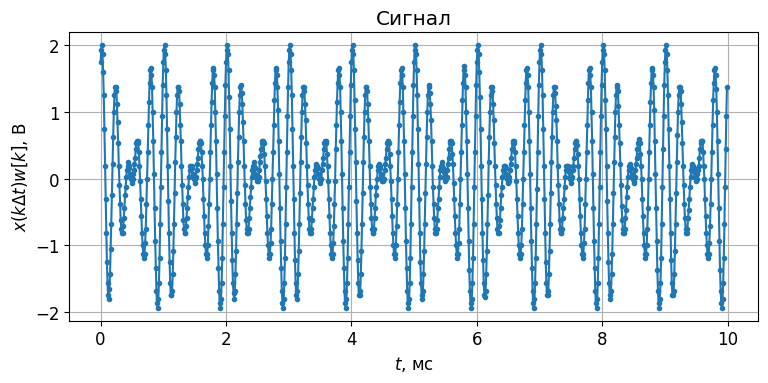

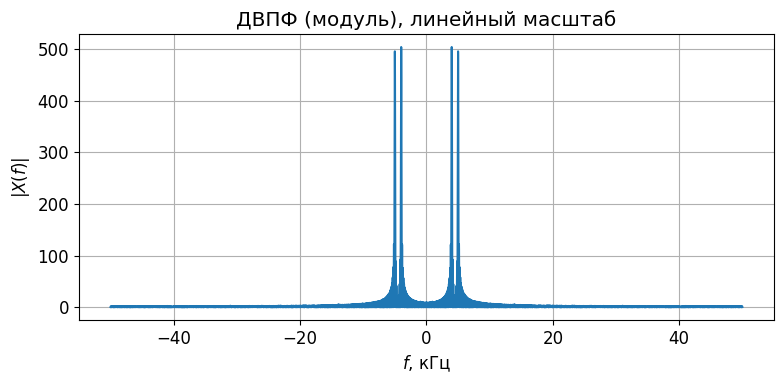

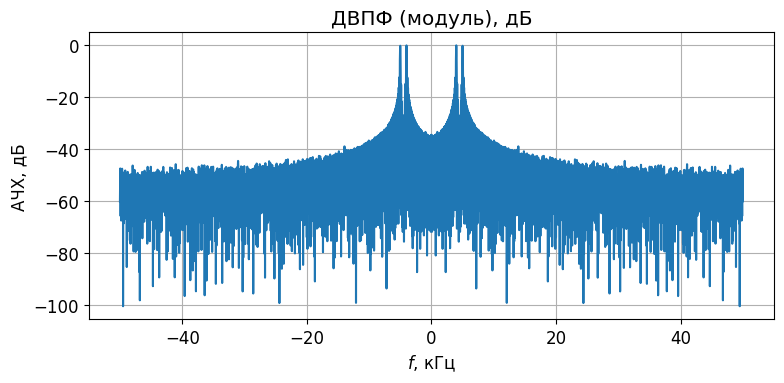

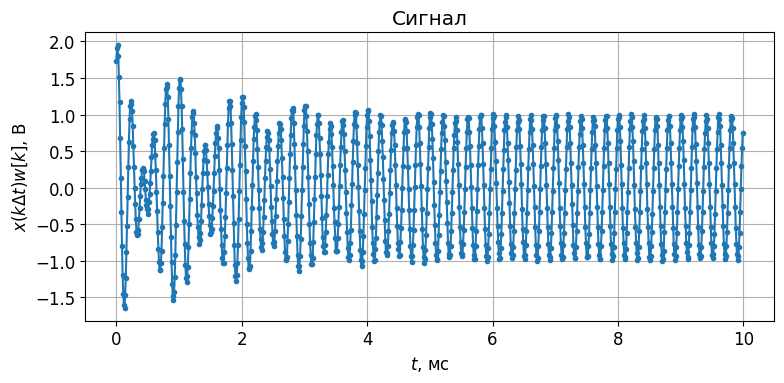

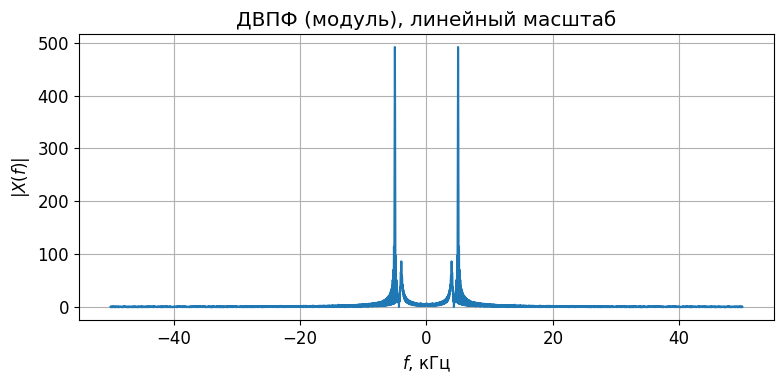

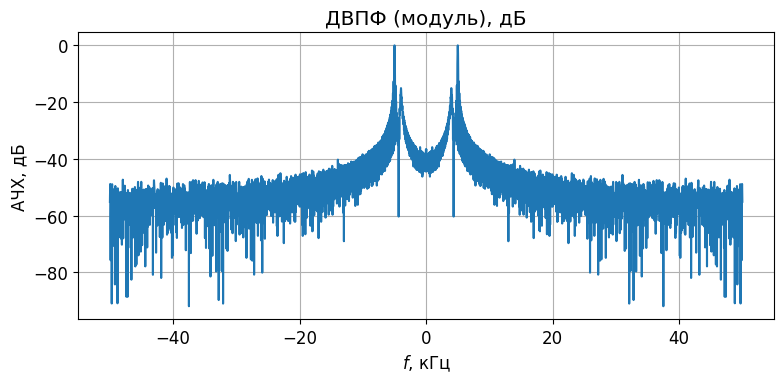

In [115]:
task_3_2()
